# Lab 2 &mdash; Fourier transform

## Submission rules:

1. The completed assignment should be prepared as s a Jupyter Notebook (.ipynb file) downloaded from your team's Google Colab. Make sure you made a copy of the notebook above and opened it via UCU email address. Submit the Jupyter Notebook (.ipynb file) to **cms**.
2. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
3. This time, you also need to provide a **work breakdown structure** estimating the efforts of each team member. Please provide it at the top of your notebook.
4. This lab requires some visualization from you; please arrange it according to best practices (appropriate axes labels, title, size/scale are a minimum).
5. The final deadline is **March 19 2024, 23:59**. Making any changes to your code after this time and date is forbidden and will be a reason for point deduction for the whole team.

Anastasiia Martsinkovska task 1, 2

Daryna Kuzyshyn task 3(subtasks 1-3)

Severyn Shykula task 3(subtasks 4-6)


## Introduction
Soon, you will learn about Fourier transform, i.e., an operator that maps functions depending on space (resp. time) variables into functions depending on spatial (resp. temporal) frequency, which is widely used in spectroscopy and signal processing.  

One of the motivations to use Fourier transform comes from the study of Fourier series. In our particular case, you will transform sound (a continuous wave that is a mixture of multiple frequencies) into an arrray of pure frequencies that can be analyzed with the help of Discrete Fourier Transform. The ultimate goal is to decompose a melody into a sequence of pitches and then to notes (without any help of a trained musician's ear &mdash; that would be cheating!).

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from IPython.display import Audio
%matplotlib inline

## Sinusoids

Let's first consider a simple example. Decompose a series sin3 that is a sum of two sinusoids using the Fast Fourier transform from scipy library. FFT is simply a computationally efficient implementation of a discrete Fourier transform. What is the frequency of sin1 and sin2 signals?

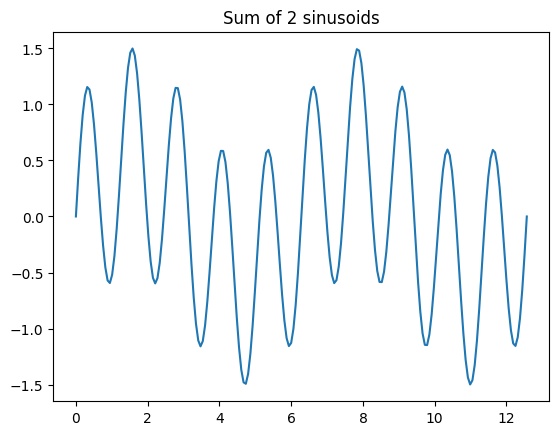

In [ ]:
x = np.linspace(0, 4*np.pi, 200)
sin1 = 0.5 * np.sin(x)
sin2 = np.sin(5*x)
sin3 = sin1 + sin2
plt.plot(x, sin3)
plt.title('Sum of 2 sinusoids')
plt.show()


Apply FFT to sin3 series to obtain frequency decomposition and plot the results.

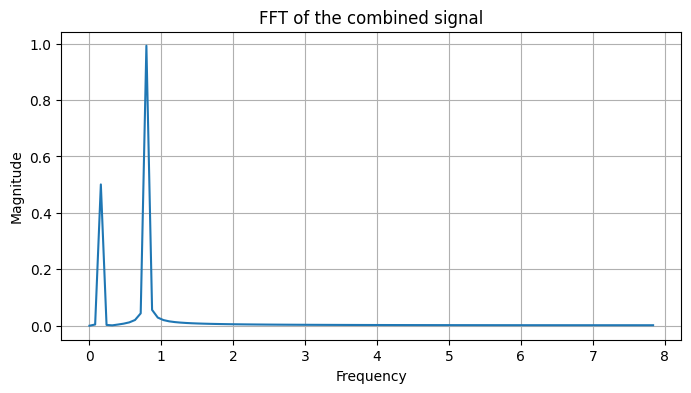

In [ ]:
# Compute the FFT
N = len(x)
T = x[1] - x[0]
yf = fft(sin3)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(8, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT of the combined signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()



Make sure that you got 2 spikes corresponding to the frequencies that we assigned to the sinusoids earlier. Explain how the transformation is conducted and why we can obtain two perfectly separated frequencies from a mixed signal.



---
>**How the transformation is conducted and why we can obtain two perfectly separated frequencies from a mixed signal?**

---

The Fast Fourier Transform (FFT) is a algorithm to compute the Discrete Fourier Transform (DFT) of a signal. The DFT is defined as:

\begin{align*}
X(k) &= \sum_{n=0}^{N-1} x(n) \cdot e^{-j \cdot 2 \pi \cdot k \cdot n / N} \
\end{align*}

where x(n) is the time-domain signal, X(k) is the frequency-domain signal, N is the number of samples, and k is the frequency index.

In the given example, we have a mixed signal sin3, which is a sum of two sinusoids sin1 and sin2.

To decompose the mixed signal into its constituent sinusoids, we can compute the DFT of sin3 using the FFT algorithm.

$$\text{frequency of sin1 = }\frac{5}{2\pi} \\
\text{frequency of sin2 = }\frac{1}{2\pi}$$
The first peak corresponds to sin1. It's approximately half the magnitude of the second peak, which corresponds to sin2.

The FFT algorithm recursively divides the DFT into smaller DFTs, which reduces the number of complex multiplications required. The algorithm computes the DFT of the even-indexed and odd-indexed samples separately and combines the results to obtain the DFT of the entire signal.

After computing the FFT of sin3, we can plot the absolute values of the frequency-domain signal to obtain the frequency-domain plot. Since sin3 is a sum of two sinusoids with frequencies $$\frac{5}{2\pi} \text{ and } \frac{1}{2\pi}$$, we can see two spikes in the frequency-domain plot corresponding to these frequencies.

The reason we can obtain two perfectly separated frequencies from a mixed signal is that the DFT is a linear transform, which means that the DFT of a sum of two signals is the sum of their individual DFTs. Therefore, the DFT of sin3 is the sum of the DFTs of sin1 and sin2, which allows us to separate the frequencies of the individual sinusoids.

Formally, we have:
\begin{align*}
sin3(n) &= sin1(n) + sin2(n)
\end{align*}

Taking the DFT of both sides, we get:

\begin{align*}
X3(k) &= X1(k) + X2(k)
\end{align*}

where X3(k), X1(k), and X2(k) are the DFTs of sin3, sin1, and sin2, respectively. Since X1(k) is nonzero only at k=1 and X2(k) is nonzero only at k=5, we can separate the frequencies of sin1 and sin2 by looking at the frequency-domain plot.

To sum up, the FFT algorithm calculates the Fourier coefficients separately for each frequency component in the signal. These coefficients, associated with different frequencies, remain independent and don't interfere with each other. As sin1 and sin2 signals have different frequencies - they will for sure appear as separate spikes in the frequency-domain plot. Therefore, we can obtain perfectly separated frequencies from a mixed signal using FFT.



## Working with example audio

Now, let's work with a more complex wave&mdash;sound. Any sound (audio signal) can be characterized by the following three quantities: Pitch, Quality, and Loudness.

Loudness is a physiological sensation that depends mainly on the sound wave pressure (amplitude).

The lowest note in a chord is called fundamental. It is heard predominantly due to larger intensity. Quality is determined by overtones or harmonics that add to the sound of a fundamental note.

Pitch is the frequency of a sound as perceived by human ear. A high frequency gives rise to a high pitch note and a low frequency produces a low pitch note. A pure tone is the sound of only one frequency, such as that given by a tuning fork or electronic signal generator. Naturally, music does not consist of pure tones. Depending on an instrument, technique and many other factors, sound will decay at different rates and one tone will mix with the other ones.

Thus, transcribing audio files into standard music notation (i.e., the notes) is a non-trivial task. We will focus on recognizing pitches and matching them to notes.

### Load and explore

In [ ]:
# Load first sound from library examples
# Monophonic trumpet recording
trumpet_path = librosa.example('trumpet')
Audio(trumpet_path)

In [ ]:
trumpet_sample, trumpet_sampling_rate = librosa.load(trumpet_path)

What is a sampling rate? What does sampling rate imply about the audio? Is it sufficient for our task (according to https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)?



>**What is a sampling rate?**
---
Sampling rate - defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal. The unit of measurement for sampling rate is Hertz (Hz), which represents the number of samples per second.


>**What does sampling rate imply about the audio?**
---
The higher the sample rate is - the more closely the final digital file will resemble the original. A higher sample rate allows more samples to be taken per second and tends to deliver a better-quality audio reproduction.

>**Is it sufficient for our task ?**
---
The Nyquist–Shannon sampling theorem (Nyquist principle) states that perfect reconstruction of a signal is possible when the sampling rate is greater than twice the maximum frequency of the signal being sampled, bacause it will avoid aliasing(a sampling effect that leads to spatial frequencies being falsely interpreted as other spatial frequencies) and allow theoretically perfect reconstruction. In our case it is sufficient because we consider music which can percieve human ear. Humans can hear roughly 20 Hz to 20 kHz. To capture this range, a sample rate of at least 44.1 kHz (standard for CDs) is needed. Even higher rates (like 96 kHz) are used for professional or high-fidelity recordings.


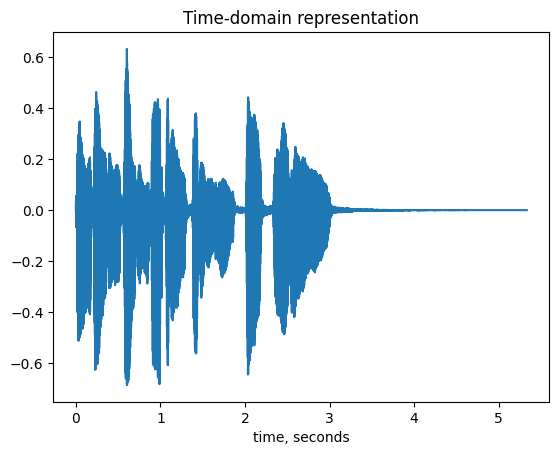

In [ ]:
# Initial visualization
time = np.array(range(trumpet_sample.shape[0])) / trumpet_sampling_rate
plt.plot(time, trumpet_sample)
plt.title('Time-domain representation')
plt.xlabel('time, seconds')
plt.show()

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence. These amplitudes are not very informative as they only represent the loudness of audio recording. To better understand the audio signal, it is necessary to transform it into the frequency domain. The frequency-domain representation of a signal tells us which frequencies are present in the signal.

Decompose the trumpet samples using fft and plot the results. Observe that the frequency pattern corresponds to the pitch changes.

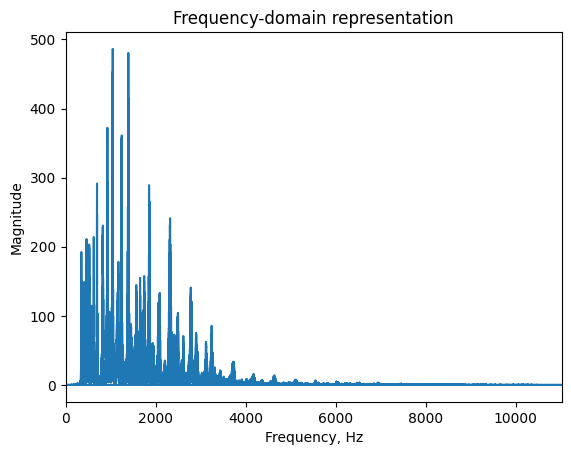

In [ ]:
# FFT for trumpet

t_fft = np.fft.fft(trumpet_sample)
magn = np.abs(t_fft)
freq = np.fft.fftfreq(trumpet_sample.shape[0], 1/trumpet_sampling_rate)

plt.plot(freq, magn)
plt.title('Frequency-domain representation')
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.xlim(0, trumpet_sampling_rate / 2)
plt.show()


## Analyzing a song

In the next task, you need to use the recording of a famous Ukrainian song (piano_melody.mp3) attached on cms. Your creativity is not limited here so any better ways to compelling visuals, more advanced algorithms on top of FFT or spectrogram, and explanations will be rewarded.     


1.   Load the recording, replay it, and plot in the time domain. To get a better view of how the notes change throughout a shorter time, choose a sample of the audio up to 5 seconds and plot it in the time domain. From here on out you will be working with this smaller 5-second sample.


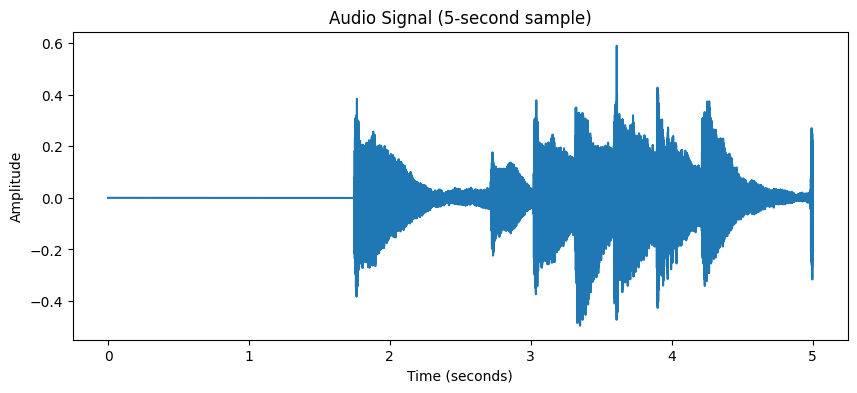

In [ ]:
# Loading sound
path = "/content/piano_melody.mp3"
samples, sampling_rate = librosa.load(path)
Audio(path)
#Creating a 5-second sample of the audio
samples = samples[:int(5 * sampling_rate)]

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(samples) / sampling_rate, len(samples)), samples)
plt.title('Audio Signal (5-second sample)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


2.   Build a spectrogram of the sample. Explain what domain the spectrogram represents us and how can it be useful.


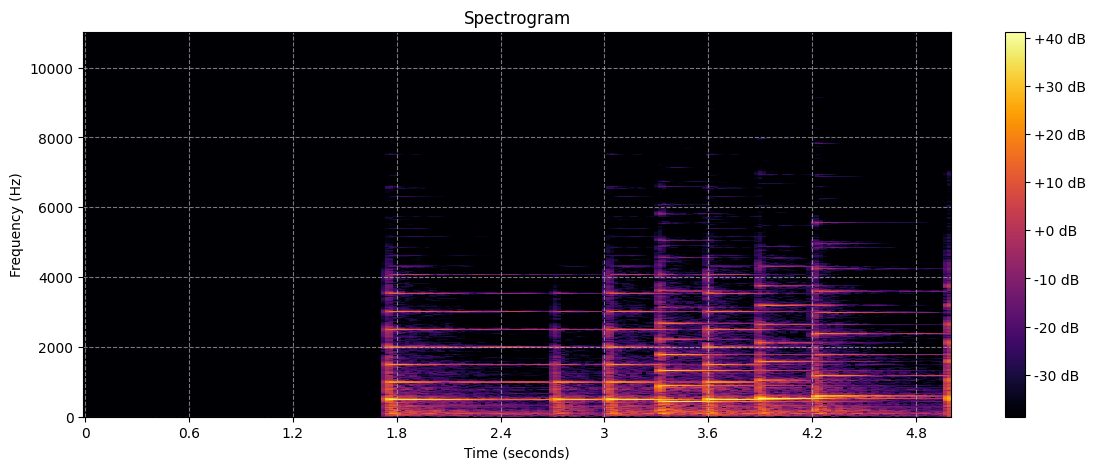

In [ ]:
# Compute the spectrogram
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



> **What domain the spectrogram represents us and how can it be useful?**

A spectrogram is a graph that displays the strength of a signal over time for a given frequency range. Using a color spectrum, it points to the frequencies where the signal’s energy is highest and shows the energy variation over time.

>**How can it be useful?**
---

1) Frequency content: A spectrogram can show the frequency content of a signal at any given time. The x-axis of the spectrogram represents time, while the y-axis represents frequency. The intensity of the color or shading in the plot represents the amplitude or power of the frequency components at that point in time.

2) Time-varying frequency content: By showing how the frequency content of a signal changes over time, a spectrogram can reveal time-varying frequency components that may not be visible in a traditional frequency-domain plot.

3) Anomalies: By comparing the spectrogram of a signal to a reference spectrogram or a spectrogram of a similar signal, anomalies in the frequency content of the signal can be identified. This can be useful in detecting abnormalities or defects in machinery or in analyzing signals for diagnostic or research purposes.

3.   Transform signal to the frequency domain with FFT and study the distribution of pitches (frequencies).
Observe that the melody contains only a couple of distinct sounds, but there are a lot more spikes in the frequency domain.

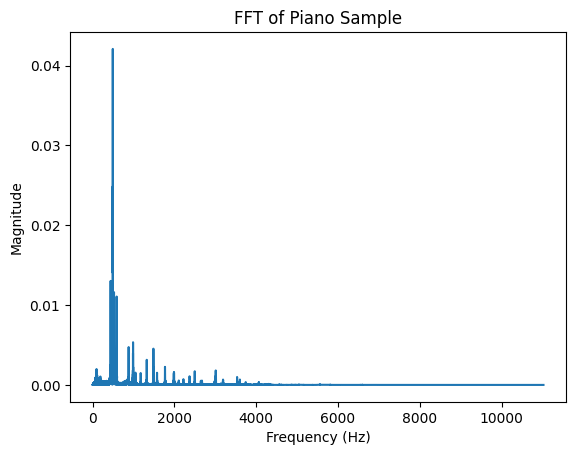

In [ ]:
# Applying FFT
n = len(samples)
fft_result = fft(samples)
freq = np.linspace(0, 1/(2*(1/sampling_rate)), n//2)


plt.plot(freq, 2.0/n * np.abs(fft_result[:n//2]))
plt.title('FFT of Piano Sample')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

4. Apply averaging to the initial signal. Averaging is a procedure that reduces number of samples by taking mean of each n of our samples. Experiment with n and determine whichever will work best to both reduce the noise and not loose any information. You can propose other ways to efficiently denoise the signal.

Let's average original signal


In [ ]:
N = 5

averaged_sample = []
for i in range(len(samples)//N):
  note = 0
  for j in range(N):
    note += samples[i*N +j]
  averaged_sample.append(note / N)
averaged_sample = np.array(averaged_sample)
Audio(np.array(averaged_sample),rate= sampling_rate//N)

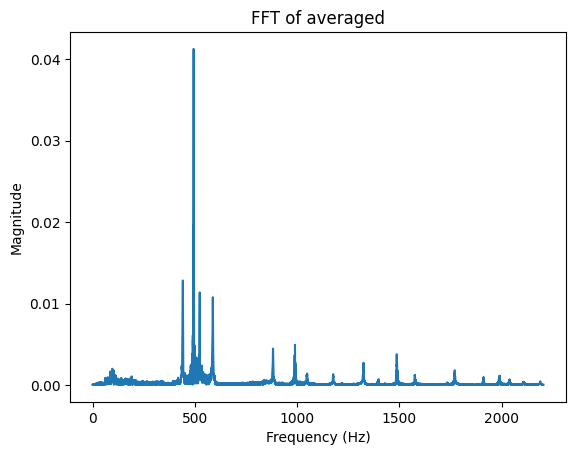

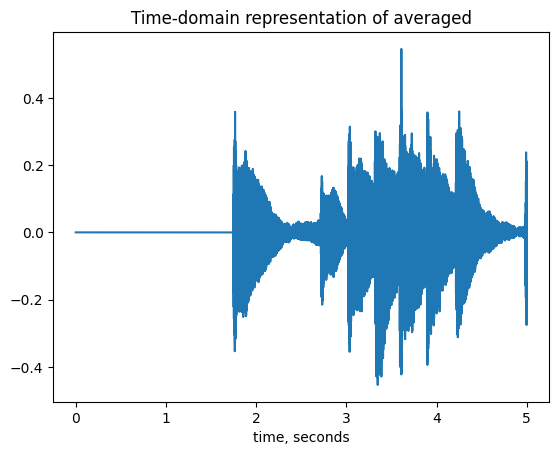

In [ ]:
n = len(averaged_sample)
fft_result = fft(averaged_sample)
freq = np.linspace(0, 1/(2*(1/(sampling_rate//N))), n//2)
plt.plot(freq, 2.0/n * np.abs(fft_result[:n//2]))
plt.title('FFT of averaged')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

time = np.array(range(averaged_sample.shape[0])) / (sampling_rate//N)
plt.plot(time, averaged_sample)
plt.title('Time-domain representation of averaged')
plt.xlabel('time, seconds')
plt.show()

Let's add noise and watch results

In [ ]:
noise = np.random.normal(0, 0.02, len(samples))
noised = samples + noise
Audio(noised, rate = sampling_rate)

In [ ]:
N = 5

averaged_sample = []
for i in range(len(noised)//N):
  note = 0
  for j in range(N):
    note += noised[i*N +j]
  averaged_sample.append(note / N)
averaged_sample = np.array(averaged_sample)
Audio(averaged_sample,rate = sampling_rate//N)

Generally, given audio isn't really noisy, so it is not the best sample to test denoising on. So we added noise manually. By trying values in range, we came to the conclusion, that with n = 5, audio quality is still good and contains less noise.


>**You can propose other ways to efficiently denoise the signal.**

---
There are a lot of methods to denoise, with some of them we will get to know throught the linear algebra course:

Principal Component Analysis (PCA): identifying the principal components of the signal and removing those associated with noise. This method can be particularly useful for removing Gaussian noise.

Singular Value Decomposition (SVD): Decompose the signal matrix using SVD and then truncate the singular values associated with noise. Reconstructing the signal using the truncated SVD will give us denoised signal.

Also, we can use Machine Learning for this task. We can use deep learning model to effectively denoise the signal, but this way requires a lot of training data. On the other hand, we can just use pretrained models and have nice results.

5. Match fundamental pitches you discovered to the standard note frequencies and display them in a table like the one outlined below.

|Detected frequency(Hz) | Assigned frequency(Hz) | Output note|   
|:---------------------:|:----------------------:|:----------:|
|393.2 |391.9| G4  

In [ ]:
# Your code here
n = len(samples)
fft_result = fft(samples)
freq = np.linspace(0, 1/(2*(1/sampling_rate)), n//2)
notes = set()
pairs = zip(2.0/n * np.abs(fft_result[:n//2]), freq)
pairs = sorted(pairs, reverse=True)
for i in range(len(freq)):
  if len(notes) > 7:
    break
  #print(pairs[i][0],pairs[i][1])
  if not librosa.hz_to_note(pairs[i][1]) in notes:
    notes.add(librosa.hz_to_note(pairs[i][1]))
    print(f'|{round(pairs[i][1],1)}|{round(librosa.note_to_hz(librosa.hz_to_note(pairs[i][1])),1)}|{librosa.hz_to_note(pairs[i][1])}')
#print(notes)

|494.2|493.9|B4
|441.4|440.0|A4
|524.0|523.3|C5
|588.0|587.3|D5
|989.8|987.8|B5
|882.2|880.0|A5
|1487.2|1480.0|F♯6
|1324.6|1318.5|E6


|Detected frequency(Hz) | Assigned frequency(Hz) | Output note|   
|:---------------------:|:----------------------:|:----------:|
|494.2|493.9|B4
|441.4|440.0|A4
|524.0|523.3|C5
|588.0|587.3|D5
|989.8|987.8|B5
|882.2|880.0|A5
|1487.2|1480.0|F♯6
|1324.6|1318.5|E6

In the last task you will use the recording of Lynyrd Skynyrd - Free Bird.

6.    Experiment with filtering of free_bird.mp3 using Butterworth filter (or other ways which you prefer), so that only bass could be heard. (Hint: you can use [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)). Replay original and filtered audios. Plot their time and frequency domains.

Let's listen to original audio


In [ ]:
import scipy
free_bird_path = "./free_bird.mp3"
free_bird_samples, free_bird_sampling_rate = librosa.load(free_bird_path)
Audio(free_bird_samples, rate = free_bird_sampling_rate)


Here is bass version


In [ ]:
filt1, filt2 = scipy.signal.butter(10, 2*250/free_bird_sampling_rate)
bass = scipy.signal.lfilter(filt1, filt2, free_bird_samples)
Audio(bass, rate = free_bird_sampling_rate)

Now let's plot frequency and time domains

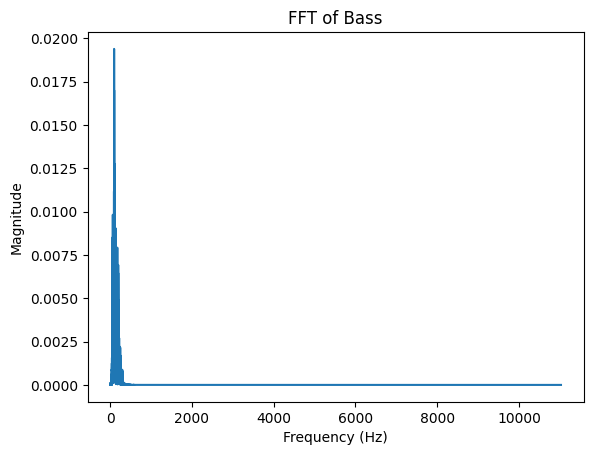

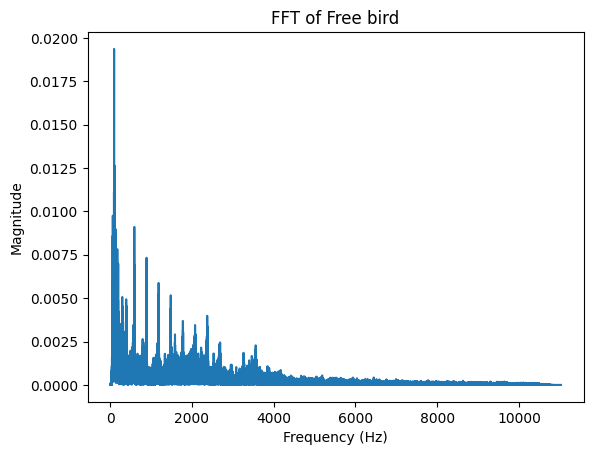

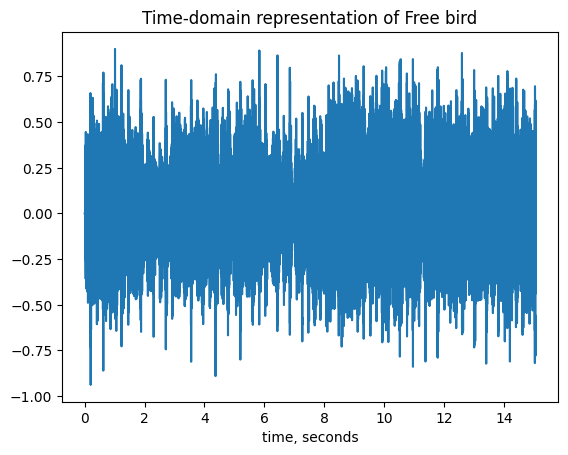

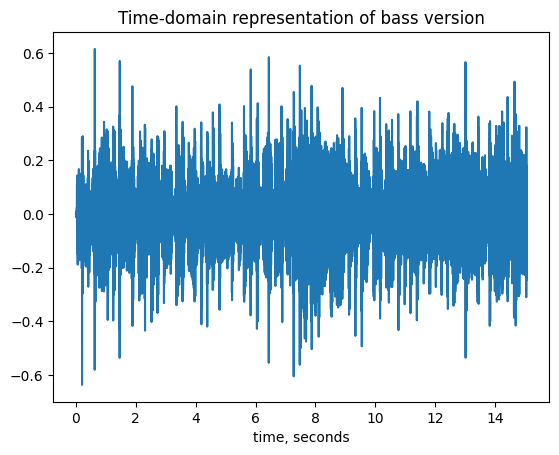

In [ ]:
n = len(bass)
fft_result = fft(bass)
freq = np.linspace(0, 1/(2*(1/free_bird_sampling_rate)), n//2)
plt.plot(freq, 2.0/n * np.abs(fft_result[:n//2]))
plt.title('FFT of Bass')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

n = len(free_bird_samples)
fft_result = fft(free_bird_samples)
freq = np.linspace(0, 1/(2*(1/free_bird_sampling_rate)), n//2)
plt.plot(freq, 2.0/n * np.abs(fft_result[:n//2]))
plt.title('FFT of Free bird')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

time = np.array(range(free_bird_samples.shape[0])) / free_bird_sampling_rate
plt.plot(time, free_bird_samples)
plt.title('Time-domain representation of Free bird')
plt.xlabel('time, seconds')
plt.show()

time = np.array(range(bass.shape[0])) / free_bird_sampling_rate
plt.plot(time, bass)
plt.title('Time-domain representation of bass version')
plt.xlabel('time, seconds')
plt.show()

---
So, in task 5 we basically used librosa functions for converattion from hz to note and vice versa. As we have FFT, we can go through frequency with biggest magnitude and check what note is this (if we have this note already, just go to next frequency). Then just construct a table.

 In task 6, we used scipy library to apply Butterworth filter to get audio under 250 Hz. As a result we got audio with bass.


## **Summary**

**1. What is Fourier transform? How can it be used in signal processing?**
The Fourier transform is a mathematical formula that transforms a signal sampled in time or space to the same signal sampled in temporal or spatial frequency. In signal processing, the Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

**2. What are time and frequency domains and how can they be useful?**

A time-domain graph displays the changes in a signal over a span of time, and frequency domain displays how much of the signal exists within a given frequency band concerning a range of frequencies. Also, a frequency-domain representation can include information on the phase shift that must be applied to each sinusoid to be able to recombine the frequency components to recover the original time signal.

For spectrogram that shows the frequency content of a signal at any given time, we need the x-axis - represents time and the y-axis represents frequency. The intensity of the color or shading in the plot represents the amplitude or power of the frequency components at that point in time.

**3. What is averaging and what is its purpose?**

Generally, we live in not ideal world and theory is far different from real experience. So is in signal processing - every signal has some imperfections - noise. So averaging - is process of averaging few measurments (taking mean or median of few measurments). Purpose of this is simple - if there is normal noise -> average of n r.v. with Normal distribution will result in r.v. with normal distribution and same $\mu$ but variance would be $\sigma / n$. So basically we sacrifice number of measurements but receive less noise in measurement as a result. But if we average too much points we will lose information, so it is applicable if we have large enough sample rate

